Utilizzando Compass, caricare sul proprio database la collection presente nel file allegato, relativa ad una serie di messaggi recuperati da una chat di gruppo di Whatsapp. I campi della collection sono:

user_id: identificativo dell'utente

message_length: lunghezza del messaggio in caratteri

has_media: indica se il messaggio contiene immagini, sticker, video, ...

has_links: indica se il messaggio ha link

full_date: indica la data e l'ora in cui è stato inviato il messaggio

Creare poi un notebook che permetta di:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pymongo
import numpy as np

1. Visualizzare i dati recuperandoli dal proprio database.

In [ ]:
client = pymongo.MongoClient('')
db = client.NAME
rest = db.Whatsapp
rest

In [7]:
df = pd.DataFrame.from_records(db.Whatsapp.find())
df

,_id,user_id,message_length,device_type,has_media,has_links,full_date
0,6197722d7e89d5c4381cc4c4,9a0f4@kp,9,android,False,False,2021-11-11T09:18:28.132Z
1,6197722d7e89d5c4381cc515,96121@kp,10,android,False,False,2021-11-12T14:07:52.605Z
2,6197722d7e89d5c4381cc550,9609a@kp,21,android,False,False,2021-11-15T08:45:21.652Z
3,6197722d7e89d5c4381cc52f,9609a@kp,37,android,False,False,2021-11-14T12:14:44.295Z
4,6197722d7e89d5c4381cc547,9679f@kp,30,web,False,False,2021-11-14T20:27:33.310Z
...,...,...,...,...,...,...,...
213,6197722d7e89d5c4381cc51b,9a0f4@kp,35,android,False,False,2021-11-12T14:08:38.892Z
214,6197722d7e89d5c4381cc571,9a0f4@kp,22,android,False,False,2021-11-15T20:01:37.875Z
215,6197722d7e89d5c4381cc58b,9609a@kp,10,android,False,False,2021-11-16T07:08:41.958Z
216,6197722d7e89d5c4381cc520,9609a@kp,44,android,False,False,2021-11-12T14:13:13.529Z


In [8]:
df['date'] = df['full_date'].str[:10] # vengono presi solo i primi 10 caratteri
df

,_id,user_id,message_length,device_type,has_media,has_links,full_date,date
0,6197722d7e89d5c4381cc4c4,9a0f4@kp,9,android,False,False,2021-11-11T09:18:28.132Z,2021-11-11
1,6197722d7e89d5c4381cc515,96121@kp,10,android,False,False,2021-11-12T14:07:52.605Z,2021-11-12
2,6197722d7e89d5c4381cc550,9609a@kp,21,android,False,False,2021-11-15T08:45:21.652Z,2021-11-15
3,6197722d7e89d5c4381cc52f,9609a@kp,37,android,False,False,2021-11-14T12:14:44.295Z,2021-11-14
4,6197722d7e89d5c4381cc547,9679f@kp,30,web,False,False,2021-11-14T20:27:33.310Z,2021-11-14
...,...,...,...,...,...,...,...,...
213,6197722d7e89d5c4381cc51b,9a0f4@kp,35,android,False,False,2021-11-12T14:08:38.892Z,2021-11-12
214,6197722d7e89d5c4381cc571,9a0f4@kp,22,android,False,False,2021-11-15T20:01:37.875Z,2021-11-15
215,6197722d7e89d5c4381cc58b,9609a@kp,10,android,False,False,2021-11-16T07:08:41.958Z,2021-11-16
216,6197722d7e89d5c4381cc520,9609a@kp,44,android,False,False,2021-11-12T14:13:13.529Z,2021-11-12


2. Visualizzare il numero di messaggi inviati in una certa data inserita dall'utente. Se i messaggi sono superiori a 50 visualizzare il messaggio: "Nel giorno <data> sono stati inviati ben <numeroMessaggi>". Se invece ne sono stati inviati di meno, visualizzare il messaggio  "Nel giorno <data> sono stati inviati solo <numeroMessaggi>". Fare in modo che il programma continui a chiedere all'utente una data fino a quando l'utente non inserisce una data non presente nel dataframe.

In [9]:
numeroMessaggi = 1
while numeroMessaggi > 0:
  data = str(input('Inserire una data: '))
  numeroMessaggi = df[df['date'] == data]['message_length'].count()
  numeroMessaggi
  if numeroMessaggi > 50:
    print('Nel giorno', data, 'sono stati inviati ben', numeroMessaggi)
  else:
    print('Nel giorno', data, 'sono stati inviati solo', numeroMessaggi)

Inserire una data: 2021-11-12
Nel giorno 2021-11-12 sono stati inviati ben 62
Inserire una data: 2021-11-15
Nel giorno 2021-11-15 sono stati inviati ben 56
Inserire una data: 2000-11-15
Nel giorno 2000-11-15 sono stati inviati solo 0


3. Visualizzare il giorno in cui sono stati inviati più messaggi.

In [10]:
# df.groupby('full_date')['user_id'].count().idxmax().split('T')[0]
df.groupby('date')['user_id'].count().idxmax()

'2021-11-12'

Per gli esercizi seguenti, inserire sempre un titolo appropriato per il grafico e i nomi degli assi. Fare in modo che in ogni grafico i colori siano diversi. Fare in modo che le labels siano sempre chiaramente leggibili.

4. Visualizzare un grafico a barre verticali che visualizzi il numero di messaggi inviati nelle varie giornate.

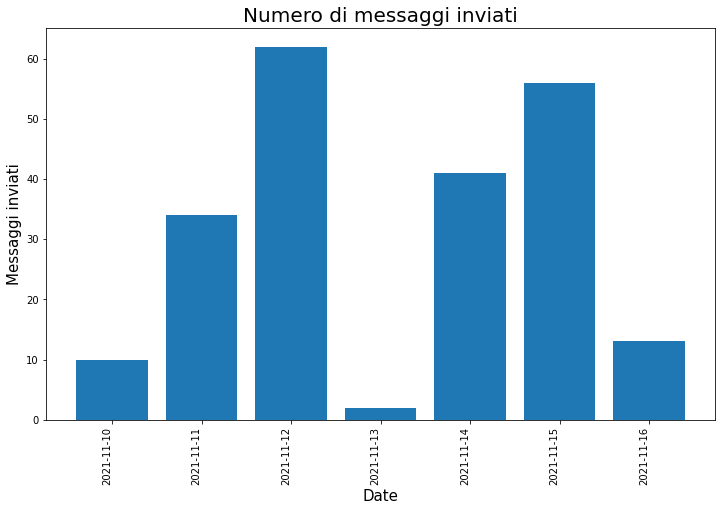

In [12]:
df1 = df.groupby('date').count()
df1
x = list(df1.index)
y = list(df1['_id'])
fig, ax = plt.subplots()
fig.set_figwidth(12)
fig.set_figheight(8)
ax.set_title('Numero di messaggi inviati', fontsize = 20)
ax.set_xlabel('Date', fontsize = 15)
ax.set_ylabel('Messaggi inviati', fontsize = 15)
ax.set_xticklabels(x, fontsize = 10)
fig.autofmt_xdate(rotation = 90)
ax.bar(x, y)
plt.show()

5. Visualizzare un grafico a barre orizzontali con l'id dell'utente sulle ordinate e il numero di messaggi inviati sulle ascisse.

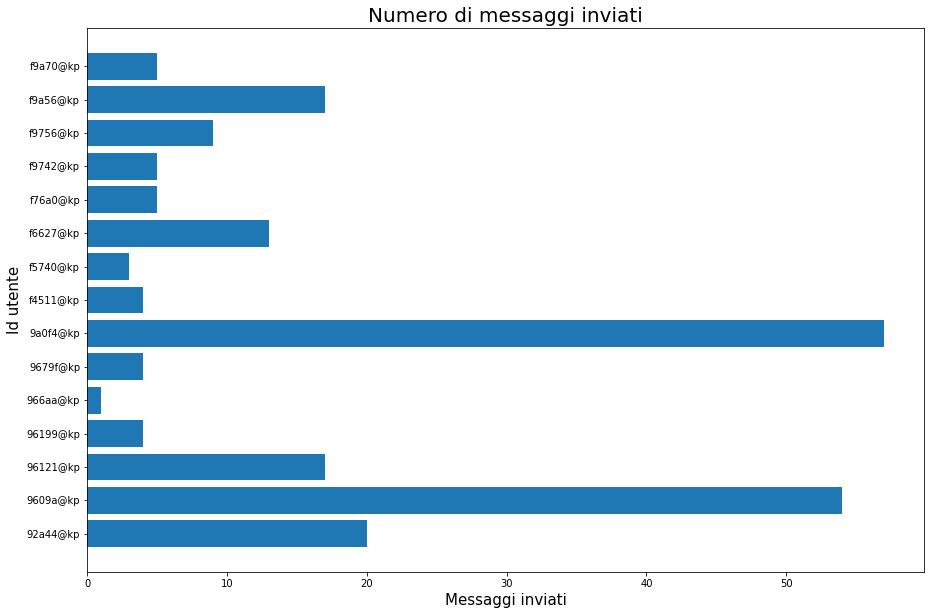

In [14]:
df2 = df.groupby('user_id').count()
df2

x = list(df2.index)
y = list(df2['_id'])
id = df2.index.values.tolist()
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(10)
ax.set_title('Numero di messaggi inviati', fontsize = 20)
ax.set_xlabel('Messaggi inviati', fontsize = 15)
ax.set_ylabel('Id utente', fontsize = 15)
ax.barh(x, y)
plt.show()

6. Visualizzare un grafico a torta che visualizzi, per ogni tipo di dispositivo, quanti utenti hanno inviato messaggi da quel tipo di dispositivo.

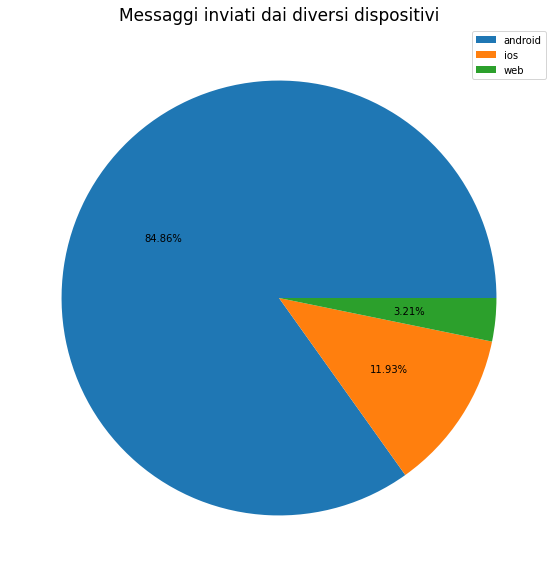

In [16]:
df3 = df['device_type'].value_counts()
labels = df3.index.values.tolist()
num = df3.tolist()
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(10)
ax.set_title('Messaggi inviati dai diversi dispositivi', fontsize = 17)
ax.pie(num, autopct = '%1.2f%%')
ax.legend(labels)
plt.show()

7. Visualizzare le stesse informazioni dell'esercizio 6 utilizzando un grafico TreeMap.

In [ ]:
!pip install squarify

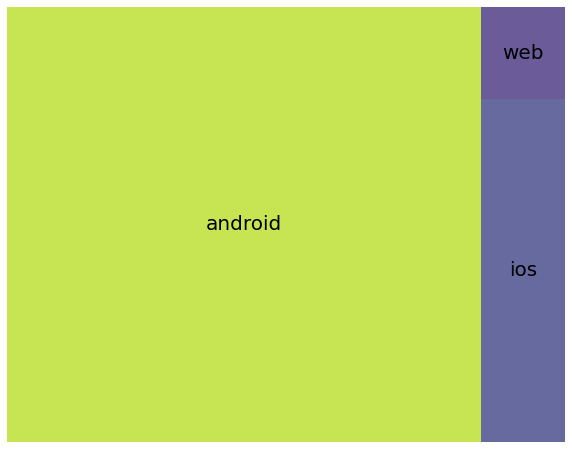

In [18]:
import squarify

df4 = df.groupby('device_type').count()
df4

labels = list(df4.index)
sizes = list(df4['_id'])

fig, ax = plt.subplots(figsize = (10, 8))
plt.rc('font', size = 20)
squarify.plot(sizes = sizes, label=labels, alpha = .8 )
plt.axis('off')
plt.show()

8. Visualizzare un grafico con gli utenti sulle ascisse e sulle ordinate, per ogni utente, i messaggi di solo testo, quelli con link e quelli con media. Il grafico deve essere analogo a quello riportato al link https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html#sphx-glr-gallery-lines-bars-and-markers-bar-stacked-py

In [19]:
# con contenuti multimediali
media = df.groupby("user_id")['has_media'].apply(lambda x: x[x == True].count()).tolist()
# con link
link = df.groupby("user_id")['has_links'].apply(lambda x: x[x == True].count()).tolist()
# solo testo
txt = df.groupby("user_id")['has_media'].apply(lambda x: x[x == False].count()).tolist()

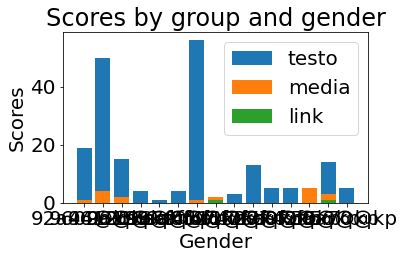

In [27]:
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(id, txt)
ax.bar(id, media)
ax.bar(id, link)

labels = ['testo', 'media', 'link']
ax.set_xlabel('Gender')
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend(labels)
fig.tight_layout()
plt.show()

9. Visualizzare le stesse informazioni del grafico precedente ma utilizzando un grafico analogo a quello presente al link https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if sys.path[0] == '':


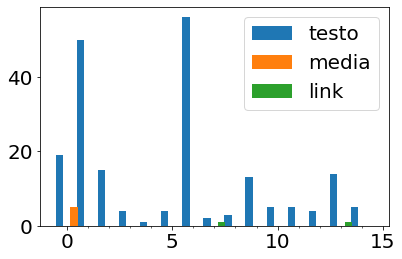

In [28]:
x = np.arange(len(id))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, txt, width, label = 'Men')
rects2 = ax.bar(width, media, width, label = 'Men')
rects3 = ax.bar(x + width, link, width, label = 'Women')

ax.set_xticks(x, labels)
ax.legend(labels)
fig.tight_layout()
ax.set_xticks(x, id)
plt.show()